In [10]:
import matplotlib.pyplot as plt
import pandas
import re
from pathlib import Path
import numpy as np
import random
import os

import Utilities

In [13]:
csv_categorized = Utilities.GetCSVDictionary()

CP1 - 120 
CP2 - 112 
CP3 - 111 
CP5 - 115 
CP6 - 103 
CP7 - 109 
CP8 - 102 
CP4 - 3 


In [3]:
cp_num = 1
cwd = os.getcwd()
validity_csv = Path(cwd) / f'Data/DataValidity/CP{cp_num}/path_validity_CP{cp_num}_cleaned_followGPS.csv'

valid_paths = []
invalid_paths = []

def PrintAllValidCSV(isValid):
    validity_df = pandas.read_csv(validity_csv, sep = ";")   
    
    # Filter out only valid files
    valid_files_df = validity_df[validity_df['Validity'] == isValid]

    # Print the valid files
    i = 0
    temp_path = []
    for index, row in valid_files_df.iterrows():
        #print(row['Path'])
        i += 1
        temp_path.append(row['Path'])
    print(i)
    return temp_path
    
valid_paths = PrintAllValidCSV(True)
invalid_paths = PrintAllValidCSV(False)
len(valid_paths + invalid_paths)

83
37


120

In [4]:
def get_sort_key(path):
    return str(path)[-12:-4]

def DrawIntersections(paths):   
    sorted_paths = sorted(paths, key=get_sort_key)
    
    num_rows = len(paths) // 8
    if len(paths) % 8:
        num_rows += 1
    fig, axs = plt.subplots(num_rows, 8, figsize=(20, num_rows*2.5))

    zoomFactor = 50
    wantedDistanceWithin = 35

    for i, path in enumerate(sorted_paths):
        try:
            cwd = os.getcwd()
            path = Path(cwd) / sorted_paths[i]
            #print(path)
            df = pandas.read_csv(path, sep=';')
            dfA = df[((df['HeadPosXA'] > -wantedDistanceWithin) & (df['HeadPosXA'] < wantedDistanceWithin)) & ((df['HeadPosZA'] > -wantedDistanceWithin) & (df['HeadPosZA'] < wantedDistanceWithin))]
            dfB = df[((df['HeadPosXB'] > -wantedDistanceWithin) & (df['HeadPosXB'] < wantedDistanceWithin)) & ((df['HeadPosZB'] > -wantedDistanceWithin) & (df['HeadPosZB'] < wantedDistanceWithin))]

            row = i // 8
            col = i % 8

            axs[row, col].plot(dfA['HeadPosXA'], dfA['HeadPosZA'],color='red')
            axs[row, col].plot(dfB['HeadPosXB'], dfB['HeadPosZB'],color='blue')

            axs[row, col].plot([-wantedDistanceWithin,-wantedDistanceWithin],[-wantedDistanceWithin,wantedDistanceWithin], color='black')
            axs[row, col].plot([-wantedDistanceWithin,wantedDistanceWithin],[wantedDistanceWithin,wantedDistanceWithin], color='black')
            axs[row, col].plot([wantedDistanceWithin,wantedDistanceWithin],[wantedDistanceWithin,-wantedDistanceWithin], color='black')
            axs[row, col].plot([wantedDistanceWithin,-wantedDistanceWithin],[-wantedDistanceWithin,-wantedDistanceWithin], color='black')

            axs[row, col].set_xlim([-zoomFactor, zoomFactor])
            axs[row, col].set_ylim([-zoomFactor, zoomFactor])

            # Set title as last 8 characters of the path
            axs[row, col].set_title(str(path)[-12:-4])
        except:
            print(f"{path} is corrupted")
            continue

    # Remove empty plots that didn't fill the grid
    if len(paths) % 8:
        for j in range(len(paths) % 8, 8):
            fig.delaxes(axs[num_rows - 1, j])

    plt.tight_layout()
    plt.show()

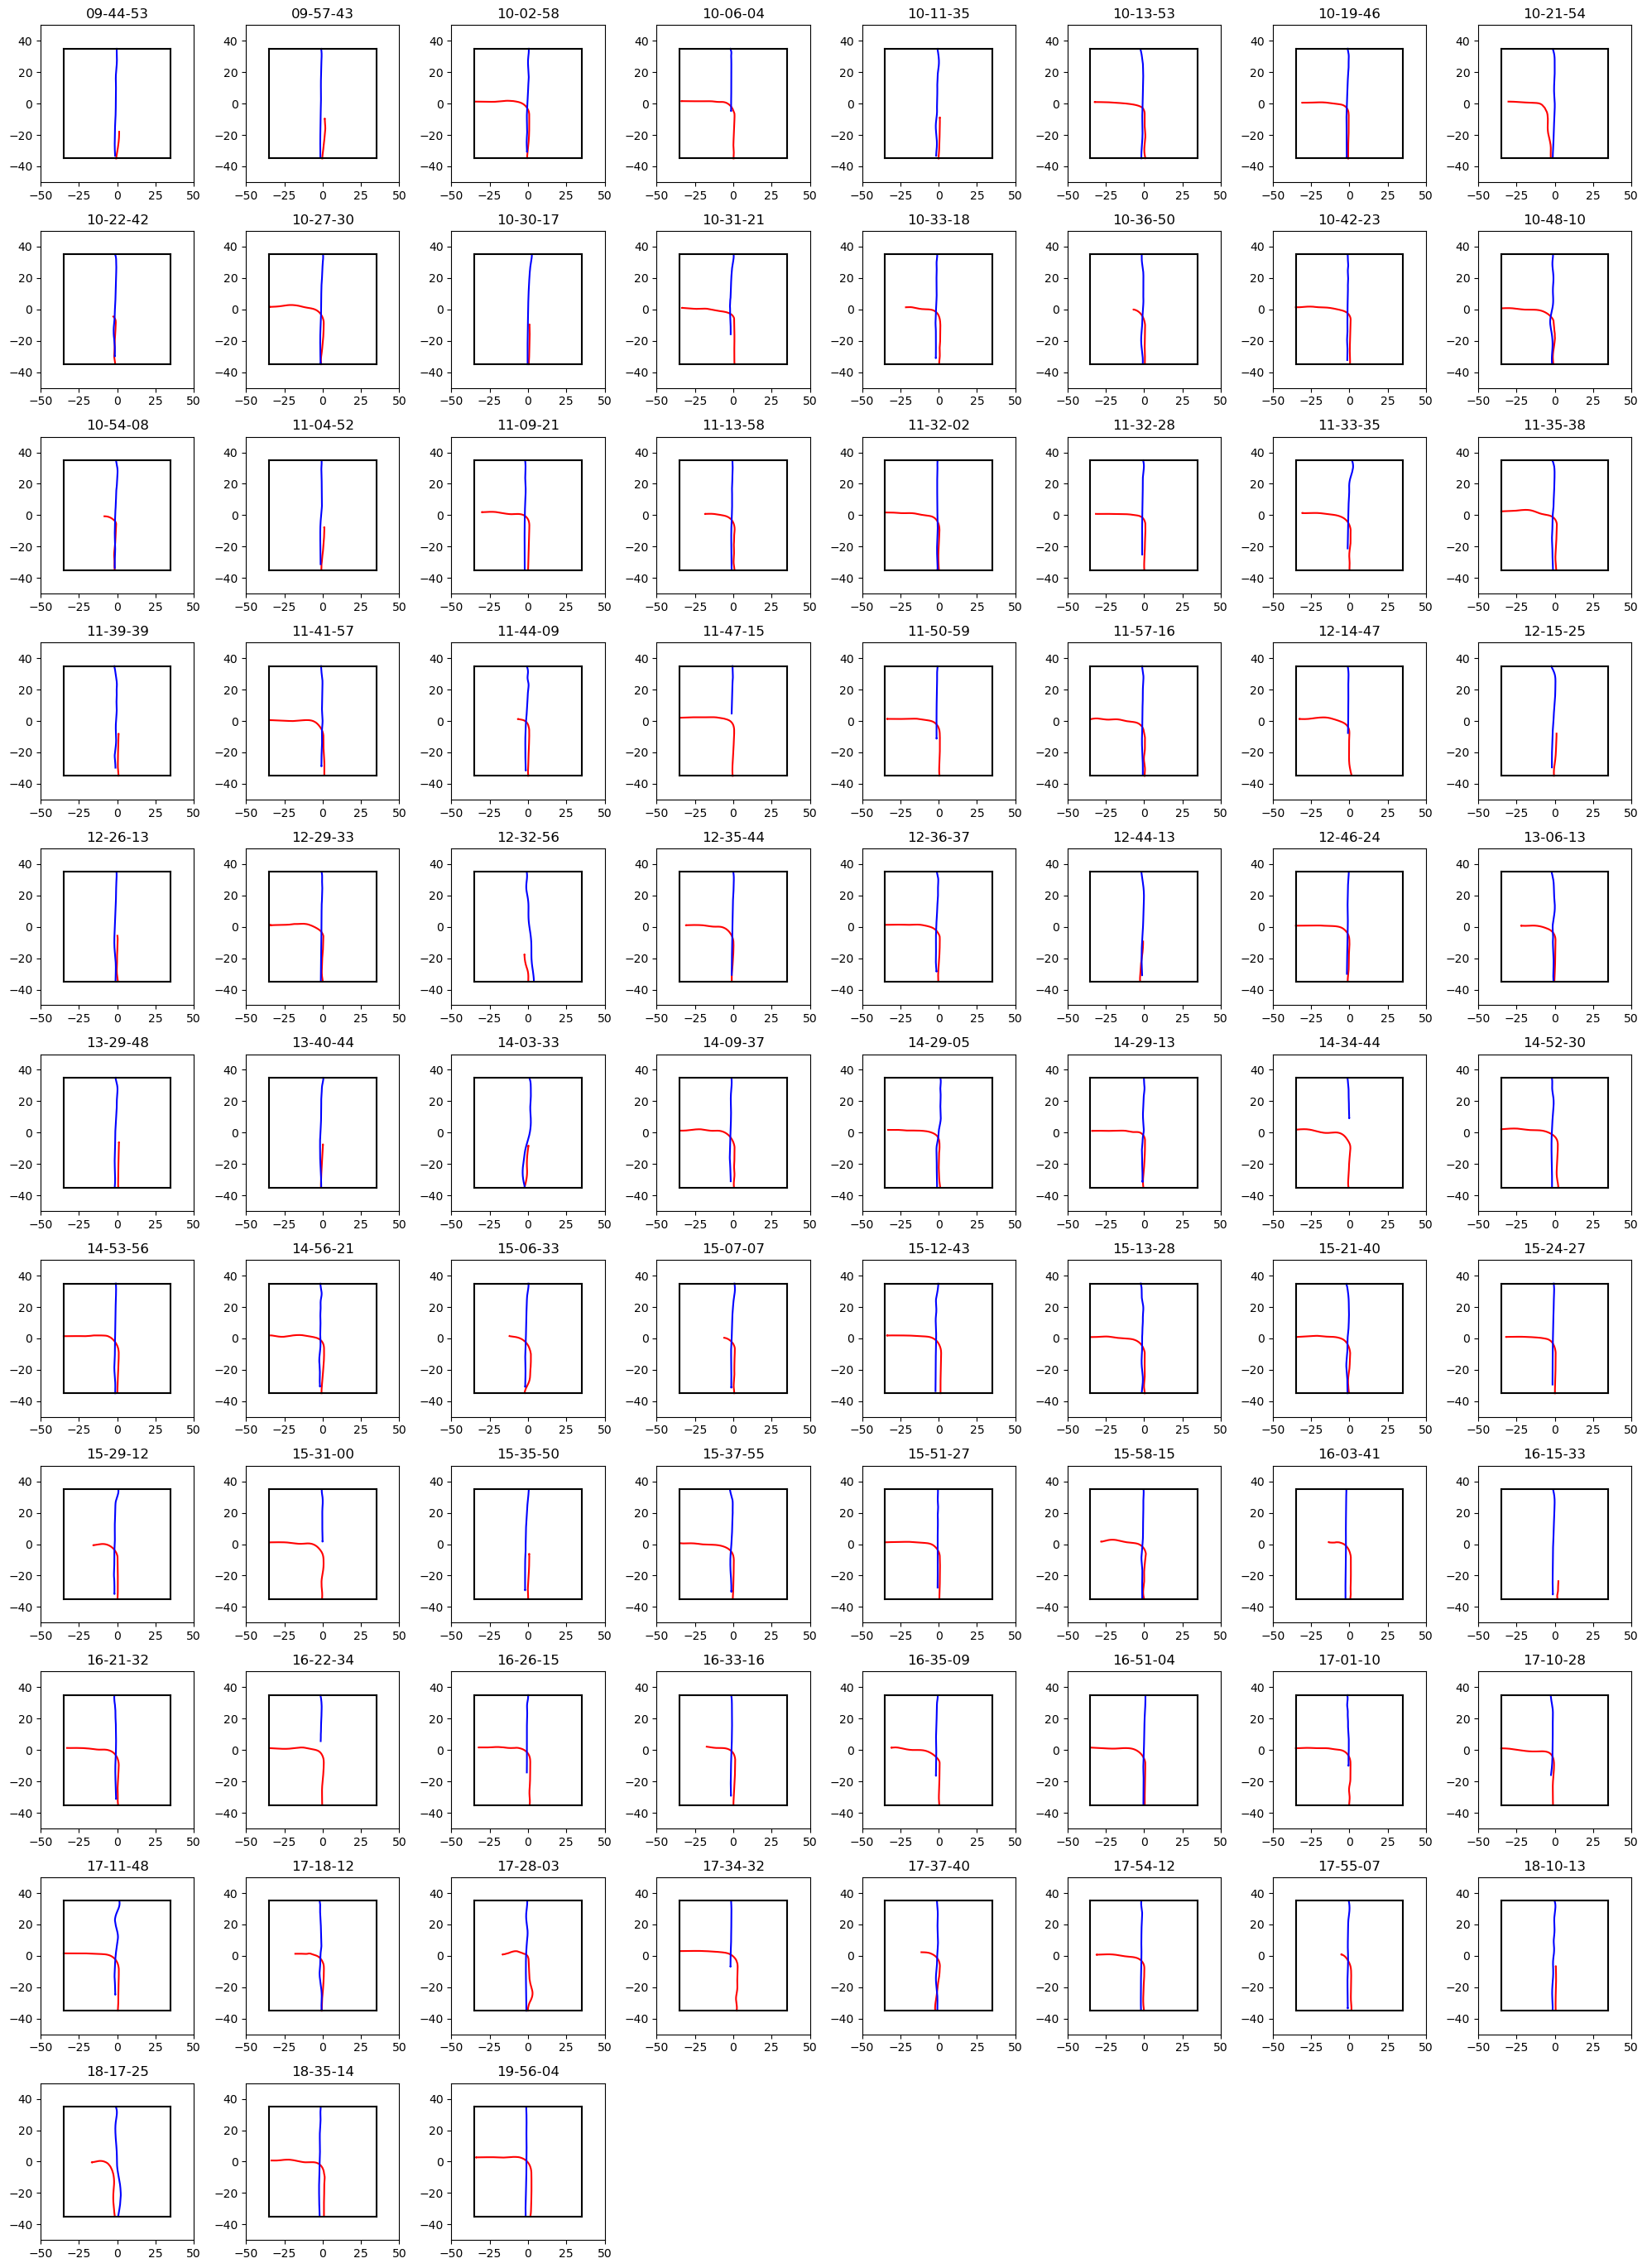

In [5]:
DrawIntersections(valid_paths)

C:\Users\farla\OneDrive\Documents\GitHub\CrossCulturalDataAnalysis\Data\CrossCultureResearchRawData\NYC34\csv\CSVScenario-CP1_Session-NYC34_2022-11-21-09-18-51.csv is corrupted
C:\Users\farla\OneDrive\Documents\GitHub\CrossCulturalDataAnalysis\Data\CrossCultureResearchRawData\Pilot Study Data\test-runs\4th\csv\CSVScenario-CP1_Session-4th_2022-05-18-12-01-26.csv is corrupted
C:\Users\farla\OneDrive\Documents\GitHub\CrossCulturalDataAnalysis\Data\CrossCultureResearchRawData\Pilot Study Data\test-runs\5th\csv\CSVScenario-CP1_Session-5th_2022-05-18-12-04-59.csv is corrupted
C:\Users\farla\OneDrive\Documents\GitHub\CrossCulturalDataAnalysis\Data\CrossCultureResearchRawData\NYC42\csv\CSVScenario-CP1_Session-NYC42_2022-12-02-16-14-47.csv is corrupted
C:\Users\farla\OneDrive\Documents\GitHub\CrossCulturalDataAnalysis\Data\CrossCultureResearchRawData\Pilot Study Data\test-runs\33\csv\CSVScenario-CP1_Session-33_2022-05-15-18-20-31.csv is corrupted
C:\Users\farla\OneDrive\Documents\GitHub\CrossCu

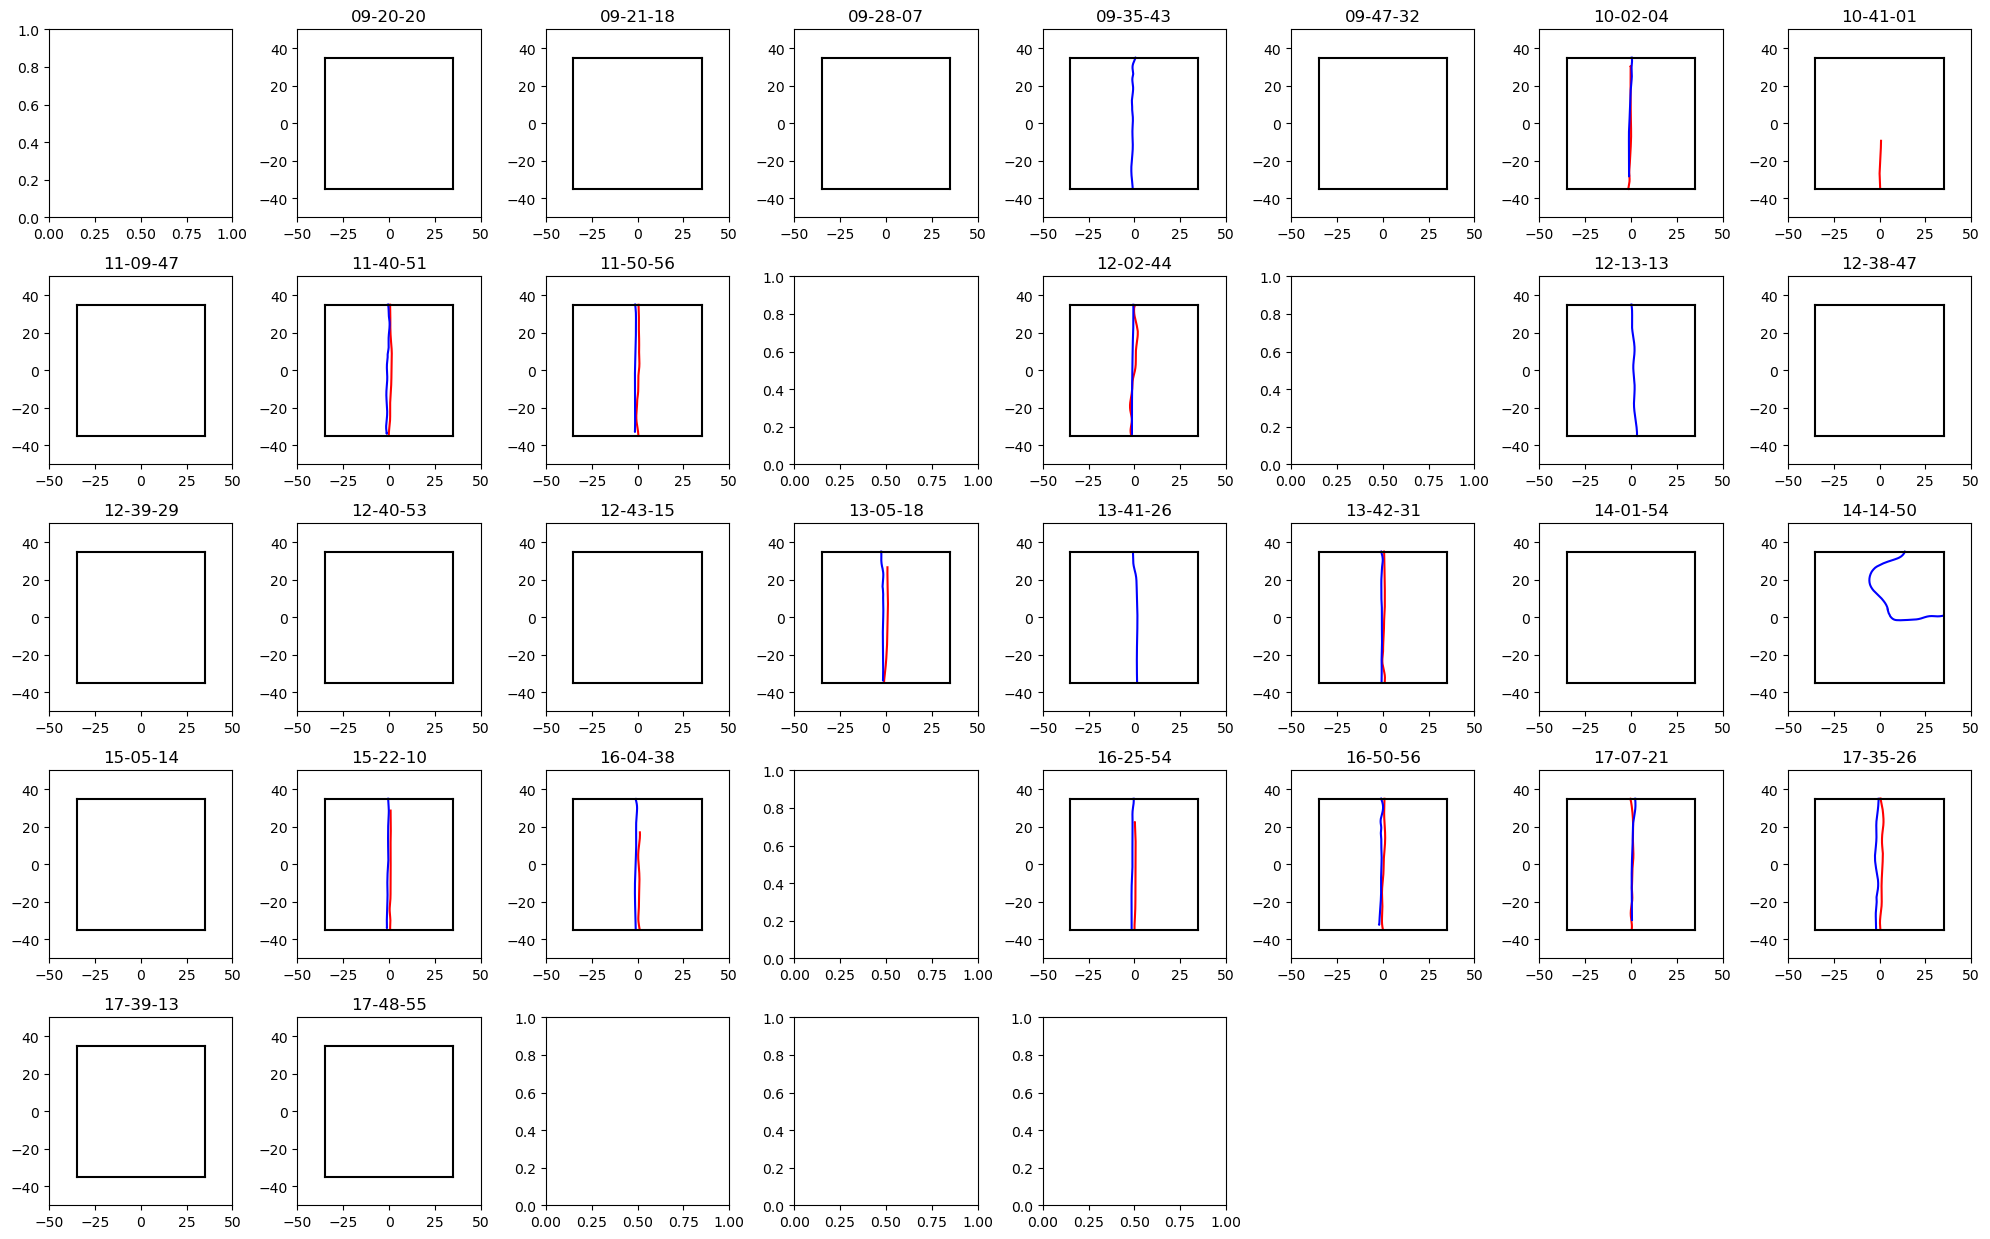

In [6]:
DrawIntersections(invalid_paths)